# Выбор локации для скважины

Вы работаете в добывающей компании. Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

# Описание проекта

**Шаги для выбора локации:**

* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

# Описание данных

**Данные геологоразведки трёх регионов находятся в файлах:**
* /datasets/geo_data_0.csv. 
* /datasets/geo_data_1.csv. 
* /datasets/geo_data_2.csv. 
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

# Условия задачи:

* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

### Подключим необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import random
from random import randint

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LinearRegression

### Откроем таблицы, посмотрем внешний вид и изучим общую информацию о данных.

In [2]:
df_zero = pd.read_csv('/datasets/geo_data_0.csv')
df_one = pd.read_csv('/datasets/geo_data_1.csv')
df_two = pd.read_csv('/datasets/geo_data_2.csv')


display(df_zero.head())
df_zero.info()
display(df_one.head())
df_one.info()
display(df_two.head())
df_two.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков нет, тип данных норм, посмотрим что с дубликатами.

### Проверим датафреймы на дубликаты

#### Проверим на явные дубликаты

In [3]:
print('Количество дубликатов строк в df_zero:', df_zero.duplicated().sum())
print('Количество дубликатов строк в df_one:', df_one.duplicated().sum())
print('Количество дубликатов строк в df_two:', df_two.duplicated().sum())

Количество дубликатов строк в df_zero: 0
Количество дубликатов строк в df_one: 0
Количество дубликатов строк в df_two: 0


Явных дубликатов строк нет.

#### Посмотрим отдельно на столбец id

In [4]:
print(df_zero['id'].value_counts())
print('Количество дубликатов строк в df_zero:', df_zero['id'].duplicated().sum())
print('_________________________________________________________________________')
print(df_zero['id'].value_counts())
print('Количество дубликатов строк в df_one:', df_one['id'].duplicated().sum())
print('_________________________________________________________________________')
print(df_zero['id'].value_counts())
print('Количество дубликатов строк в df_two:', df_two['id'].duplicated().sum())




Tdehs    2
AGS9W    2
bsk9y    2
fiKDv    2
TtcGQ    2
        ..
5oayR    1
tGQ5k    1
ln0us    1
ZVWnl    1
3THhS    1
Name: id, Length: 99990, dtype: int64
Количество дубликатов строк в df_zero: 10
_________________________________________________________________________
Tdehs    2
AGS9W    2
bsk9y    2
fiKDv    2
TtcGQ    2
        ..
5oayR    1
tGQ5k    1
ln0us    1
ZVWnl    1
3THhS    1
Name: id, Length: 99990, dtype: int64
Количество дубликатов строк в df_one: 4
_________________________________________________________________________
Tdehs    2
AGS9W    2
bsk9y    2
fiKDv    2
TtcGQ    2
        ..
5oayR    1
tGQ5k    1
ln0us    1
ZVWnl    1
3THhS    1
Name: id, Length: 99990, dtype: int64
Количество дубликатов строк в df_two: 4


Всего 18 сток с задвоенными id из 30000, просто удалим их, ведь это меньше десятой процента.

In [5]:
df_zero.drop_duplicates(['id'],keep='first',inplace=True)
df_one.drop_duplicates(['id'],keep='first',inplace=True)
df_two.drop_duplicates(['id'],keep='first',inplace=True)
print('Количество дубликатов строк в df_zero:', df_zero['id'].duplicated().sum())
print('Количество дубликатов строк в df_one:', df_zero['id'].duplicated().sum())
print('Количество дубликатов строк в df_two:', df_zero['id'].duplicated().sum())

Количество дубликатов строк в df_zero: 0
Количество дубликатов строк в df_one: 0
Количество дубликатов строк в df_two: 0


### Посмотрим на распределение значений в столбцах f0, f1, f2

In [6]:
display(df_zero.describe())
display(df_one.describe())
display(df_two.describe())

,f0,f1,f2,product
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500454,0.250141,2.502629,92.499684
std,0.871844,0.504430,3.248149,44.288304
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072572,-0.200877,0.287784,56.497069
50%,0.502405,0.250252,2.515969,91.847928
75%,1.073626,0.700640,4.715035,128.563699
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


Напишем функцию boxplot для визуализации распределения данных по всем столбцам.

In [7]:
def boxplot_fun(frame, ylims=None):
    fig, axes = plt.subplots(1,4,figsize=(16,8)) 
    i = -1
    for columns in ['f0', 'f1', 'f2', 'product']:
        i = i + 1
        ax = frame.boxplot(
            column=columns,
            fontsize=15, 
            figsize=(10,5),
            boxprops=dict(linestyle='-', linewidth=3),
            medianprops=dict(linestyle='-', linewidth=2),
            whiskerprops=dict(linestyle='-', linewidth=2),
            capprops=dict(linestyle='-', linewidth=2),
            notch=True, ax=axes[i]
        )
        ax.set_xlabel('')
        ax.set_title('')
        if ylims != None:
            ax.set_ylim(ylims)
        


Boxplot для df_zero


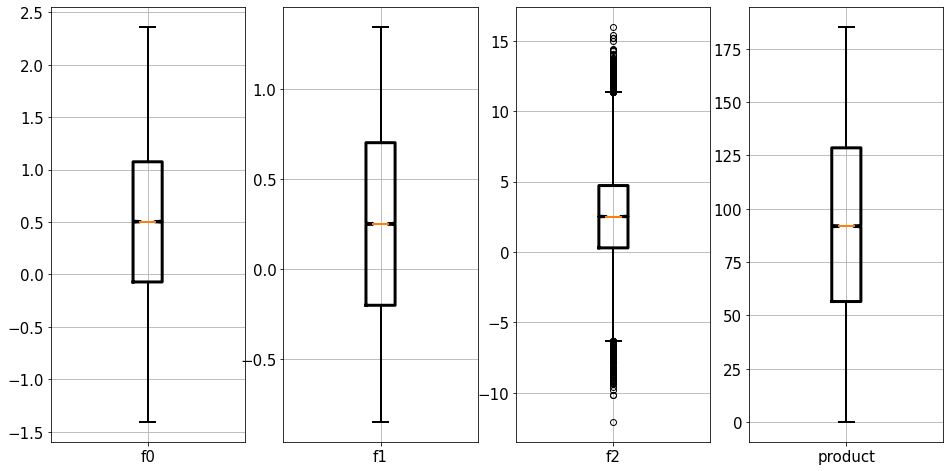

In [8]:
print('Boxplot для df_zero')
boxplot_fun(df_zero)

Boxplot для df_zero


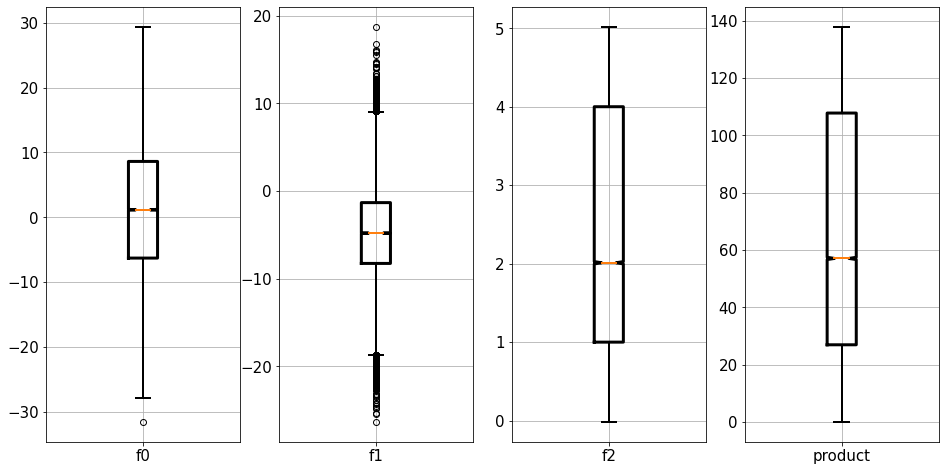

In [9]:
print('Boxplot для df_zero')
boxplot_fun(df_one)

Boxplot для df_zero


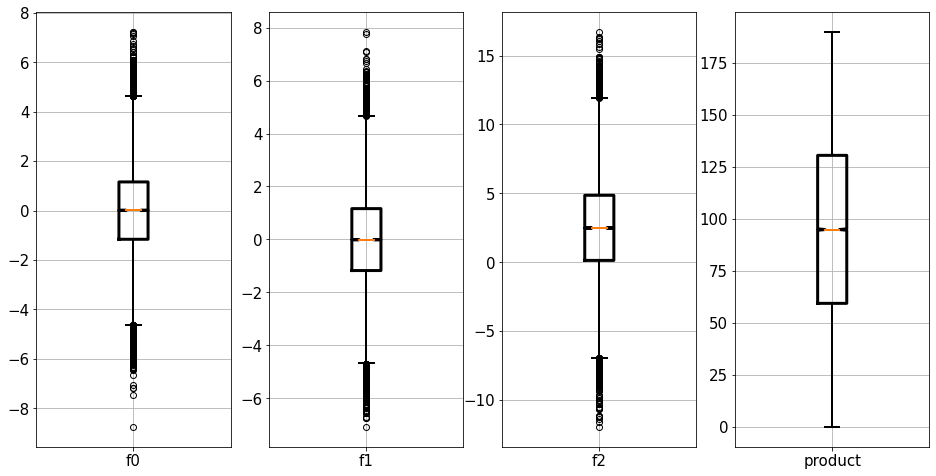

In [10]:
print('Boxplot для df_zero')
boxplot_fun(df_two)

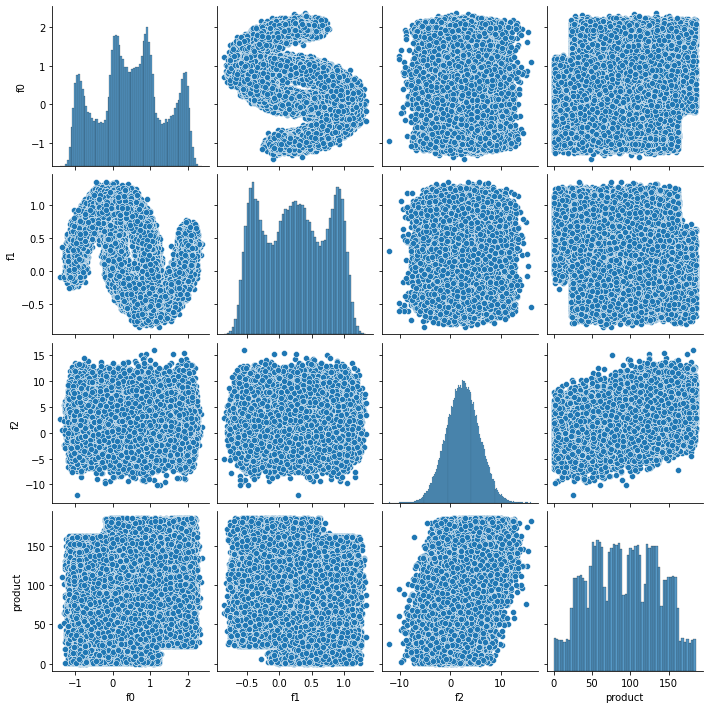

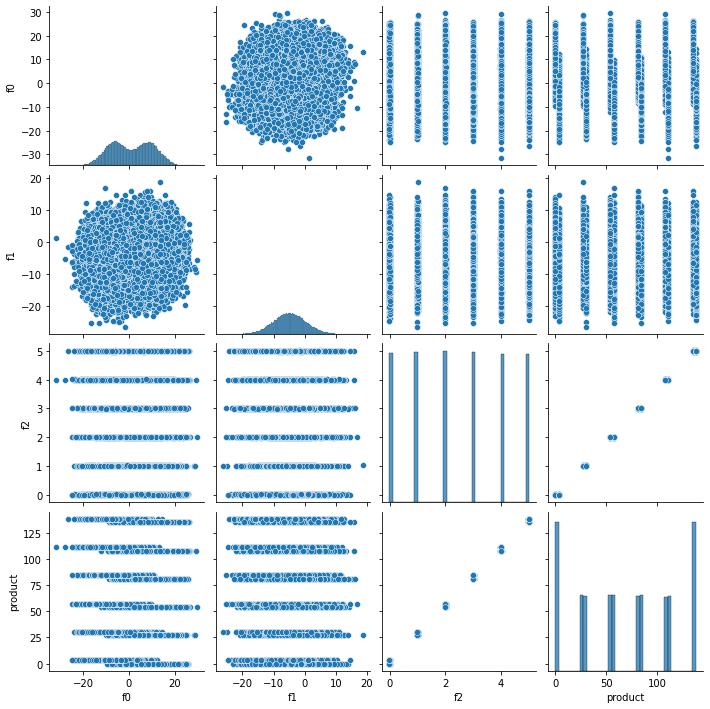

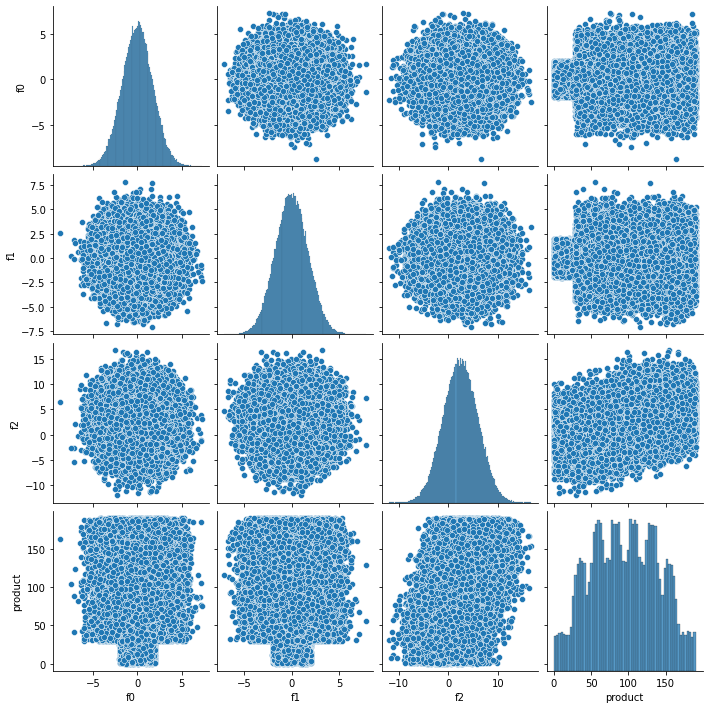

In [11]:
sns.pairplot(df_zero[['f0', 'f1', 'f2', 'product']], diag_kind = 'hist', kind = 'scatter')
sns.pairplot(df_one[['f0', 'f1', 'f2', 'product']], diag_kind = 'hist', kind = 'scatter')
sns.pairplot(df_two[['f0', 'f1', 'f2', 'product']], diag_kind = 'hist', kind = 'scatter')

Не вывод, а скорее мысли:
* Для нулевого региона Boxplot показывает симметричное распределение данных без выбросов, за исключением столбца f2, там есть выбросы в районе нижней и верхней границе и за ними.
* Для первого региона Boxplot показывает небольшое смещение медианы вниз у f2 и product, распределение данных без выбросов, за исключением столбца f1, там есть выбросы в районе нижней и верхней границе и за ними.
* Для нулевого региона Boxplot показывает симметричное распределение данных с выбросами в столбцах f0, f1, f2  в районе нижней и верхней границе и за ними.
* Сначала я хотел избавиться от выбросов для более корректного обучения модели линейной регрессии, но после визуализации данных с помощью pairplot передумал.
* Визуализация данных с помощью pairplot показала, что нулевой регион скорее всего состоит из двух подрегионов или одного региона, но с данными содержащими биноминальные критерии, только этим можно объяснить визуальные моно и взаимные распределения, и удаление выбросов в f2 может исказить общую картину. 
* pairplot первого региона показывает о нормальном распределении f0 b f1 и скорее о категориальных данных в f2 и product.
* pairplot второго региона показывает о нормальном распределении, дополненном категориальными признаками.
* Для всех трех регионов визуальный разброс данных не вызывает желание избавятся от выбросов. 
* Для первого региона, наверное, можно было попробовать модели классификации.


### **Вывод:** 
* Посмотрели внешний вид и изучили общую информацию о данных
* Проверили датафреймы на дубликаты, и избавились от задвоенных данных
* describe, boxplot и pairplot показали о готовности данных для дальнейшей работы с ними

## Обучение и проверка модели

### Напишем функцию learning_prediction
которая разобьет данные на обучающую и валидационную выборки в соотношении 75:25, обучит модель LR и валидационной выборке найдет:
* Размер обучающей выборки
* Размер валидационной выборки
* Размер predictions
* RMSE модели линейной регрессии
* Средний запас предсказанного сырья

для региона из лучших 200 точек добычи

In [12]:
def learning_prediction(frame):    
    features = frame.drop(['id', 'product'], axis=1)
    target = frame['product']

    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345) # отделите 25% данных для валидационной выборки

    model = LinearRegression()# инициализируйте модель LinearRegression
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получите предсказания модели на валидационной выборке

    result = round(mean_squared_error(target_valid, predictions_valid) ** 0.5, 3) # посчитайте значение метрики RMSE на валидационной выборке
    predictions_valid_mean = round(predictions_valid.mean(), 3)
    print('Размер обучающей выборки:', features_train.shape[0])
    print('Размер валидационной выборки:', features_valid.shape[0])
    print('Размер predictions:', predictions_valid.shape[0])
    print("RMSE модели линейной регрессии на валидационной выборке:", result)
    print("Cредний запас предсказанного сырья:", predictions_valid_mean)
    
    
    
    return (target_valid, predictions_valid, predictions_valid_mean, result)

### Найдем для каждого региона

* Размер обучающей выборки
* Размер валидационной выборки
* Размер predictions
* RMSE модели линейной регрессии
* Средний запас предсказанного сырья


In [13]:
print("     ------------- Для нулевого региона ------------")
print('                   --- df_zero ---')
(target_valid_df_zero
 , predictions_valid_df_zero
 , predictions_valid_df_zero_mean
 , result_df_zero) = learning_prediction(df_zero)
print()

print("     ------------- Для первого региона ------------")
print('                   --- df_one ---')
(target_valid_df_one
 , predictions_valid_df_one
 , predictions_valid_df_one_mean
 , result_df_one) = learning_prediction(df_one)
print()
print("     ------------- Для второго региона ------------")
print('                   --- df_two ---')
(target_valid_df_two
 , predictions_valid_df_two
 , predictions_valid_df_two_mean
 , result_df_two) = learning_prediction(df_two)

     ------------- Для нулевого региона ------------
                   --- df_zero ---
Размер обучающей выборки: 74992
Размер валидационной выборки: 24998
Размер predictions: 24998
RMSE модели линейной регрессии на валидационной выборке: 37.854
Cредний запас предсказанного сырья: 92.789

     ------------- Для первого региона ------------
                   --- df_one ---
Размер обучающей выборки: 74997
Размер валидационной выборки: 24999
Размер predictions: 24999
RMSE модели линейной регрессии на валидационной выборке: 0.892
Cредний запас предсказанного сырья: 69.178

     ------------- Для второго региона ------------
                   --- df_two ---
Размер обучающей выборки: 74997
Размер валидационной выборки: 24999
Размер predictions: 24999
RMSE модели линейной регрессии на валидационной выборке: 40.076
Cредний запас предсказанного сырья: 94.866


### **Вывод:** 
* Создали функцию которая разбивает данные на обучающую и валидационную выборки в соотношении 75:25, обучает модель LR и по валидационной выборке находит из лучших 200 точек добычи:
 * RMSE модели линейной регрессии
 * Средний запас предсказанного сырья
* Для каждого региона нашли значения:
 * RMSE модели линейной регрессии
 * Средний запас предсказанного сырья
из лучших 200 точек добычи. 

Пока лучшим выглядит второй район


## Подготовка к расчёту прибыли

### Все ключевые значения для расчётов прибыли сохраним в отдельных переменных

In [14]:
BUDGET = 10*(10**9)
POINTS = 500
BEST_POINTS = 200
PRICE_PER_BARREL = 450*(10**3)
PROFIT_THRESHOLD = 2.5*(10**-2)

print('Бюджет на разработку скважин в регионе (руб):', BUDGET)
print('Количество исследуемых скважин в регионе (шт):', POINTS)
print('Количество лучших для разработки исследуемых скважин в регионе (шт):', BEST_POINTS)
print('Доход с каждой единицы продукта (руб за тыс. баррелей):', PRICE_PER_BARREL)
print('Вероятность убытков (доли от единицы):', PROFIT_THRESHOLD)

Бюджет на разработку скважин в регионе (руб): 10000000000
Количество исследуемых скважин в регионе (шт): 500
Количество лучших для разработки исследуемых скважин в регионе (шт): 200
Доход с каждой единицы продукта (руб за тыс. баррелей): 450000
Вероятность убытков (доли от единицы): 0.025


### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [15]:
min_income = BUDGET / BEST_POINTS
min_stock = round(min_income / PRICE_PER_BARREL, 2)
print('Минимальный доход со скважины для безубыточности (руб):', min_income)
print('Минимальный запас баррелей в скважине для безубыточности (тыс. баррелей):', min_stock)

Минимальный доход со скважины для безубыточности (руб): 50000000.0
Минимальный запас баррелей в скважине для безубыточности (тыс. баррелей): 111.11


### **Вывод:** 
* Средние запасы сырья по регионам (из describe п 1.4):
 * нулевой - 92 тыс. баррелей
 * первый - 69 тыс. баррелей
 * второй - 95 тыс. баррелей
* Минимальный запас баррелей в скважине для безубыточности (тыс. баррелей): 111.11
* Полученный объём сырья выше чем средним запас в каждом регионе.
* Для прибыльной разработки потребуется выбор скважин.

## Написание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели

### Напишем функцию для рачета прибыли c 200 лучших скважин по "мнению" предсказания

In [16]:
def profit_cal(target_valid, predictions_valid):
    predictions_valid_sort = pd.Series(predictions_valid).sort_values(ascending=False)[:BEST_POINTS] 
    target_valid_sort = (target_valid.reset_index(drop = True)[predictions_valid_sort.index])
    total_profit = int((target_valid_sort.sum() * PRICE_PER_BARREL) - BUDGET)
    return total_profit

### Найдем прибыль с полученного объёма сырья за минусом бюджета для 200 лучших скважин по разным регионам по валидационной выборке для каждого региона. 

In [17]:
total_profit_df_zero = profit_cal(target_valid_df_zero, predictions_valid_df_zero)
print('Прибыль с полученного объёма сырья за минусом бюджета по 200 лучших скважин для нулевого региона:'
      , total_profit_df_zero, 'рублей')
total_profit_df_one = profit_cal(target_valid_df_one, predictions_valid_df_one)
print('Прибыль с полученного объёма сырья за минусом бюджета по 200 лучших скважин для нулевого региона:'
      , total_profit_df_one, 'рублей')
total_profit_df_two = profit_cal(target_valid_df_two, predictions_valid_df_two)
print('Прибыль с полученного объёма сырья за минусом бюджета по 200 лучших скважин для нулевого региона:'
      , total_profit_df_two, 'рублей')

Прибыль с полученного объёма сырья за минусом бюджета по 200 лучших скважин для нулевого региона: 3365187237 рублей
Прибыль с полученного объёма сырья за минусом бюджета по 200 лучших скважин для нулевого региона: 2415086696 рублей
Прибыль с полученного объёма сырья за минусом бюджета по 200 лучших скважин для нулевого региона: 2501283853 рублей


### **Вывод:** 
* Написали функцию для расчёта прибыли c 200 лучших скважин
* Выбрали 200 лучших скважин из валидационной выборке по предсказаниям модели
* Нашли прибыль с полученного объёма сырья для каждого региона
* Здесь нулевой регион на первом месте

## Расчёт рисков и прибыли для каждого региона

### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

#### Напишем функцию которая применяет технику Bootstrap с 1000 выборок, каждая из которых соответствует колличеству точек используемых при разработке региона (POINTS=500), и обращается к функции profit_cal для расчета прибыли с  лучших 200 точек, также находит:
* Среднюю прибыль
* 95%-й доверительный итервал
* Вероятность убытков

In [18]:
def profit(target, predictions):

    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        predictions_subsample = pd.Series(predictions).sample(POINTS, replace=True, random_state=state)# < напишите код здесь>
        total_profit = profit_cal(target, predictions_subsample)
        values.append(total_profit)

    loss_share =  len([item for item in values if item < 0]) * 100 / len(values)  
    distribution_profit = pd.Series(values)
    lower = int(distribution_profit.quantile(0.025))
    above = int(distribution_profit.quantile(0.975))
    mean = int(distribution_profit.mean())
    return distribution_profit, mean, lower, above, loss_share
    

#### Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков.

In [19]:
print()
(distribution_profit_zero, mean_profit_zero, lower_zero, above_zero, loss_share_zero) = profit(target_valid_df_zero
                                                                               , predictions_valid_df_zero)
print('Средняя прибыль (с учетом техники Bootstrap с 1000 выборками) для нулевого региона:'
      , mean_profit_zero, 'рублей')
print('95%-й доверительный интервал для нулевого региона находится в промежутке от', lower_zero,'до', above_zero, 'рублей')
print(f'Вероятность убытков для нулевого региона: {loss_share_zero}%')
print()
print()
(distribution_profit_one, mean_profit_one, lower_one, above_one, loss_share_one) = profit(target_valid_df_one
                                                                               , predictions_valid_df_one)
print('Средняя прибыль (с учетом техники Bootstrap с 1000 выборками) для первого региона:'
      , mean_profit_one, 'рублей')
print('95%-й доверительный интервал для первого региона находится в промежутке от', lower_one,'до', above_one, 'рублей')
print(f'Вероятность убытков для первого региона: {loss_share_one}%')
print()
print()
(distribution_profit_two, mean_profit_two, lower_two, above_two, loss_share_two) = profit(target_valid_df_two
                                                                               , predictions_valid_df_two)
print('Средняя прибыль (с учетом техники Bootstrap с 1000 выборками) для второго региона:'
      , mean_profit_two, 'рублей')
print('95%-й доверительный интервал для второго региона находится в промежутке от', lower_two,'до', above_two, 'рублей')
print(f'Вероятность убытков для второго региона: {loss_share_two}%')


Средняя прибыль (с учетом техники Bootstrap с 1000 выборками) для нулевого региона: 380613469 рублей
95%-й доверительный интервал для нулевого региона находится в промежутке от -142942739 до 890976833 рублей
Вероятность убытков для нулевого региона: 7.7%


Средняя прибыль (с учетом техники Bootstrap с 1000 выборками) для первого региона: 478484939 рублей
95%-й доверительный интервал для первого региона находится в промежутке от 89525124 до 866604744 рублей
Вероятность убытков для первого региона: 1.2%


Средняя прибыль (с учетом техники Bootstrap с 1000 выборками) для второго региона: 330546257 рублей
95%-й доверительный интервал для второго региона находится в промежутке от -190365733 до 840467403 рублей
Вероятность убытков для второго региона: 11.3%


### **Вывод:** 
* С помощью техники Bootstrap с 1000 выборками, нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков.

* Получили:
  * Средняя прибыль (с учетом техники Bootstrap с 1000 выборок) для нулевого региона: 380613469 рублей
  * 95%-й доверительный итервал для нулевого региона находится в промежутке от -142942739 до 890976833 рублей
  * Вероятность убытков для нулевого региона: 7.7%
  * Средняя прибыль (с учетом техники Bootstrap с 1000 выборок) для первого региона: 478484939 рублей
  * 95%-й доверительный итервал для первого региона находится в промежутке от 89525124 до 866604744 рублей
  * Вероятность убытков для первого региона: 1.2%
  * Средняя прибыль (с учетом техники Bootstrap с 1000 выборок) для второго региона: 330546257 рублей
  * 95%-й доверительный итервал для второго региона находится в промежутке от -190365733 до 840467403 рублей
  * Вероятность убытков для второго региона: 11.3%
  
**В соответствии с условиями проекта рик убытка должен быть больше 2,5%, а значит нам подходит только первый регион с риском убытка 1,2%**

### **Общий вывод**
1. Нам были предоставлены данные проб нефти и ее запасов по точкам в трёх регионах.
2. Мы построили модель для определения региона, где добыча принесёт наибольшую прибыль.
3. Мы провели анализ возможной прибыли и рисков техникой Bootstrap.

В частности, по пунктам было сделано:
* Посмотрели внешний вид и изучили общую информацию о данных
* Проверили датафреймы на дубликаты, и избавились от задвоенных данных
* describe, boxplot и pairplot показали о готовности данных для дальнейшей работы с ними

Далее:
* Средние запасы сырья по регионам (из describe п 1.4):
 * нулевой - 92 тыс. баррелей
 * первый - 69 тыс. баррелей
 * второй - 95 тыс. баррелей
* Минимальный запас баррелей в скважине для безубыточности (тыс. баррелей): 111.11
* Полученный объём сырья выше чем средним запас в каждом регионе.
* Для прибыльной разработки потребуется выбор скважин.

И наконец:
* С помощью техники Bootstrap с 1000 выборками, нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков.
* Получили:
  * Средняя прибыль (с учетом техники Bootstrap с 1000 выборок) для нулевого региона: 380613469 рублей
  * 95%-й доверительный интервал для нулевого региона находится в промежутке от -142942739 до 890976833 рублей
  * Вероятность убытков для нулевого региона: 7.7%
  * Средняя прибыль (с учетом техники Bootstrap с 1000 выборок) для первого региона: 478484939 рублей
  * 95%-й доверительный интервал для первого региона находится в промежутке от 89525124 до 866604744 рублей
  * Вероятность убытков для первого региона: 1.2%
  * Средняя прибыль (с учетом техники Bootstrap с 1000 выборок) для второго региона: 330546257 рублей
  * 95%-й доверительный интервал для второго региона находится в промежутке от -190365733 до 840467403 рублей
  * Вероятность убытков для второго региона: 11.3%
  
**В соответствии с условиями проекта риск убытка должен быть больше 2,5%, а значит нам подходит только первый регион с риском убытка 1,2%**
